In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.utils.multiclass import unique_labels
# import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

import plotly.express as px

#os.chdir(r'N:\STOCK ADVISOR BOT')

In [22]:

def prepare_lagged_features(df_Stock, lag_stock =20, lag_index =5):

        print('Preparing Lagged Features for Stock, Index Funds.....')
        lags = range(1, lag_stock+1)
        lag_cols= ['Close']
        df_Stock=df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

       
        lags = range(1, lag_index+1)
        lag_cols= ['QQQ_Close','SnP_Close','DJIA_Close']
        df_Stock= df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

        df_Stock = df_Stock.drop(columns=lag_cols)


        remove_lags_na = max(lag_stock, lag_index) + 1
        print('Removing NAN rows - ', str(remove_lags_na))
        df_Stock = df_Stock.iloc[remove_lags_na:,]
        return df_Stock

    
    
def get_mape(y_true, y_pred): 
        """
        Compute mean absolute percentage error (MAPE)
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

'''
for i in range(4):
    print(i)
    #name='v'+str(i)
    locals()['v'+str(i)]=i+i
    print(locals()['v'+str(i)])
'''


"\nfor i in range(4):\n    print(i)\n    #name='v'+str(i)\n    locals()['v'+str(i)]=i+i\n    print(locals()['v'+str(i)])\n"

# Buy and hold

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_23 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 12s - loss: 0.0037
Epoch 2/25
494/494 - 8s - loss: 0.0015
Epoch 3/25
494/494 - 8s - loss: 0.0013
Epoch 4/25
494/494 - 8s - loss: 0.0011
Epoch 5/25
494/494 - 8s - loss: 0.0012
Epoch 6/25
494/494 - 8s - loss: 0.0013
Epoch 7/25
494/494 - 8s - loss: 0.0010
Epoch 8/25
494/4

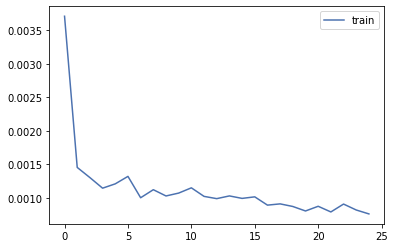

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_25 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0078
Epoch 2/25
494/494 - 8s - loss: 0.0034
Epoch 3/25
494/494 - 8s - loss: 0.0029
Epoch 4/25
494/494 - 8s - loss: 0.0032
Epoch 5/25
494/494 - 8s - loss: 0.0028
Epoch 6/25
494/494 - 8s - loss: 0.0025
Epoch 7/25
494/494 - 8s - loss: 0.0027
Epoch 8/25
494/4

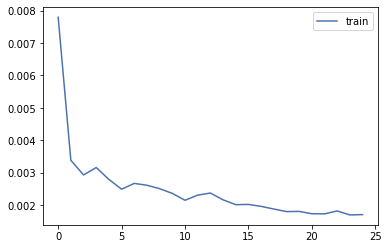

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_27 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0086
Epoch 2/25
494/494 - 8s - loss: 0.0043
Epoch 3/25
494/494 - 8s - loss: 0.0042
Epoch 4/25
494/494 - 8s - loss: 0.0034
Epoch 5/25
494/494 - 8s - loss: 0.0034
Epoch 6/25
494/494 - 8s - loss: 0.0031
Epoch 7/25
494/494 - 8s - loss: 0.0032
Epoch 8/25
494/49

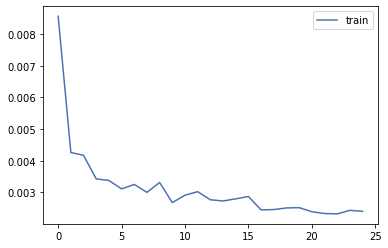

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_29 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0070
Epoch 2/25
494/494 - 8s - loss: 0.0026
Epoch 3/25
494/494 - 8s - loss: 0.0021
Epoch 4/25
494/494 - 8s - loss: 0.0020
Epoch 5/25
494/494 - 8s - loss: 0.0021
Epoch 6/25
494/494 - 8s - loss: 0.0019
Epoch 7/25
494/494 - 8s - loss: 0.0018
Epoch 8/25
494/494

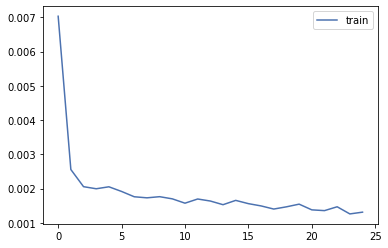

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_31 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0075
Epoch 2/25
494/494 - 8s - loss: 0.0041
Epoch 3/25
494/494 - 8s - loss: 0.0044
Epoch 4/25
494/494 - 8s - loss: 0.0042
Epoch 5/25
494/494 - 8s - loss: 0.0044
Epoch 6/25
494/494 - 8s - loss: 0.0041
Epoch 7/25
494/494 - 8s - loss: 0.0038
Epoch 8/25
494/4

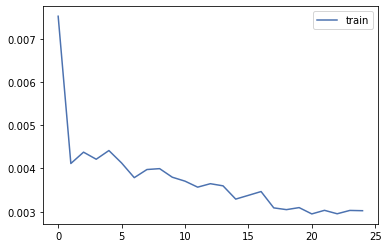

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_33 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0059
Epoch 2/25
494/494 - 8s - loss: 0.0023
Epoch 3/25
494/494 - 8s - loss: 0.0021
Epoch 4/25
494/494 - 8s - loss: 0.0020
Epoch 5/25
494/494 - 8s - loss: 0.0021
Epoch 6/25
494/494 - 8s - loss: 0.0021
Epoch 7/25
494/494 - 8s - loss: 0.0020
Epoch 8/25
494/4

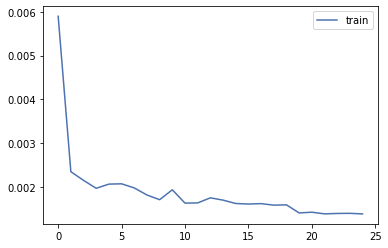

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_35 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0054
Epoch 2/25
494/494 - 8s - loss: 0.0028
Epoch 3/25
494/494 - 8s - loss: 0.0024
Epoch 4/25
494/494 - 8s - loss: 0.0022
Epoch 5/25
494/494 - 8s - loss: 0.0019
Epoch 6/25
494/494 - 8s - loss: 0.0019
Epoch 7/25
494/494 - 8s - loss: 0.0021
Epoch 8/25
494/4

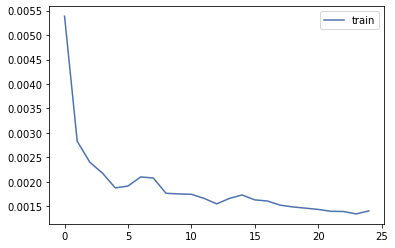

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_37 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0071
Epoch 2/25
494/494 - 8s - loss: 0.0023
Epoch 3/25
494/494 - 8s - loss: 0.0020
Epoch 4/25
494/494 - 8s - loss: 0.0018
Epoch 5/25
494/494 - 8s - loss: 0.0015
Epoch 6/25
494/494 - 8s - loss: 0.0017
Epoch 7/25
494/494 - 8s - loss: 0.0015
Epoch 8/25
494/4

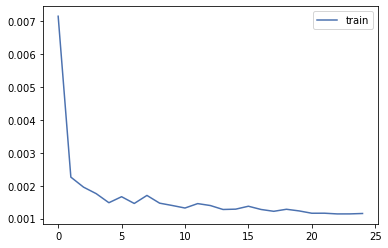

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_39 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0056
Epoch 2/25
494/494 - 8s - loss: 0.0036
Epoch 3/25
494/494 - 8s - loss: 0.0028
Epoch 4/25
494/494 - 8s - loss: 0.0030
Epoch 5/25
494/494 - 8s - loss: 0.0031
Epoch 6/25
494/494 - 8s - loss: 0.0029
Epoch 7/25
494/494 - 8s - loss: 0.0027
Epoch 8/25
494/4

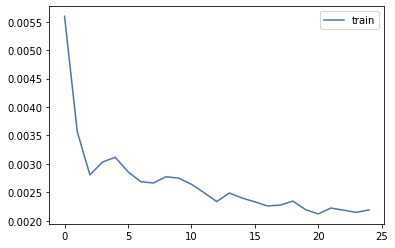

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 35, 150)           91200     
_________________________________________________________________
lstm_41 (LSTM)               (None, 150)               180600    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0066
Epoch 2/25
494/494 - 8s - loss: 0.0021
Epoch 3/25
494/494 - 8s - loss: 0.0023
Epoch 4/25
494/494 - 8s - loss: 0.0020
Epoch 5/25
494/494 - 8s - loss: 0.0018
Epoch 6/25
494/494 - 8s - loss: 0.0016
Epoch 7/25
494/494 - 8s - loss: 0.0017
Epoch 8/25
494/4

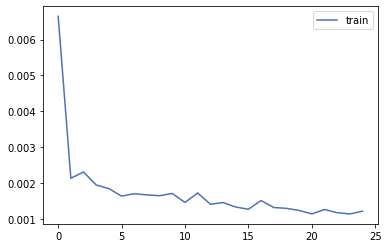

In [23]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [24]:

#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred1 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred1['NEE'].pct_change()
DUK_daily_returns = TEST_pred1['DUK'].pct_change()

SO_daily_returns = TEST_pred1['SO'].pct_change()
D_daily_returns = TEST_pred1['D'].pct_change()

EXC_daily_returns = TEST_pred1['EXC'].pct_change()
AEP_daily_returns = TEST_pred1['AEP'].pct_change()

SRE_daily_returns = TEST_pred1['SRE'].pct_change()
XEL_daily_returns = TEST_pred1['XEL'].pct_change()

PEG_daily_returns = TEST_pred1['PEG'].pct_change()
WEC_daily_returns = TEST_pred1['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred1 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred1 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred1 = TESTDailyReturn_pred1
atx_comps_rets_cumprod_pred1 = TESTCUM_pred1

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred1, x=atx_comps_rets_cumprod_pred1.index, y=atx_comps_rets_cumprod_pred1.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred1, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred1, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred1 = EfficientFrontier(mu, Sigma)
    ef_pred1.efficient_return(i)
    vol_ef.append(ef_pred1.portfolio_performance()[1])

ef_pred1 = EfficientFrontier(mu, Sigma)
ef_pred1.min_volatility()
min_vol_ret = ef_pred1.portfolio_performance()[0]
min_vol_vol = ef_pred1.portfolio_performance()[1]

ef_pred1.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred1.portfolio_performance()[0]
max_sharpe_vol = ef_pred1.portfolio_performance()[1]


portfolioREAL_Pred1 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)





Expected annual return: 2.7%
Annual volatility: 5.5%
Sharpe Ratio: 0.33


(0.027150579810708536, 0.05542182571431237, 0.32749877104862773)

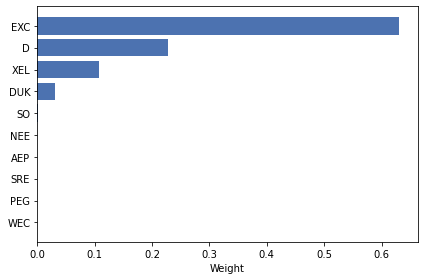

In [25]:

ef_pred1 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred1 = ef_pred1.min_volatility()

plot_weights(raw_weights_minvar_exp_pred1)
ef_pred1.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 38.2%
Annual volatility: 10.8%
Sharpe Ratio: 3.47


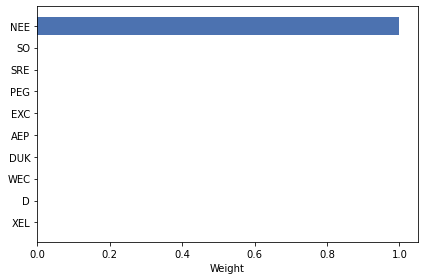

In [26]:
ef_pred1 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred1.max_sharpe(risk_free_rate=0.009)
Weight_Pred1  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred1,AV1_Pred1,SR1_Pred1=ef_pred1.portfolio_performance(verbose = True, risk_free_rate = 0.009)


In [27]:
Weight_Pred1= raw_weights_maxsharpe_exp.values()

LISTValue_Pred1= list(Weight_Pred1)

SUMpredict_Pred1 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred1))*np.mat(np.array(SUMpredict_Pred1))

per_Pred1 = pd.DataFrame(hhhhh.T,columns = ['per_Pred1'])


In [28]:

PortfolioREAL_Daily_Return_Pred1 = portfolioREAL_Pred1.pct_change()

PortfolioREAL_cum_returns_Pred1 = (PortfolioREAL_Daily_Return_Pred1 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred1))*(np.mat(np.array(LISTValue_Pred1)).T)

perreal_Pred1 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred1'])


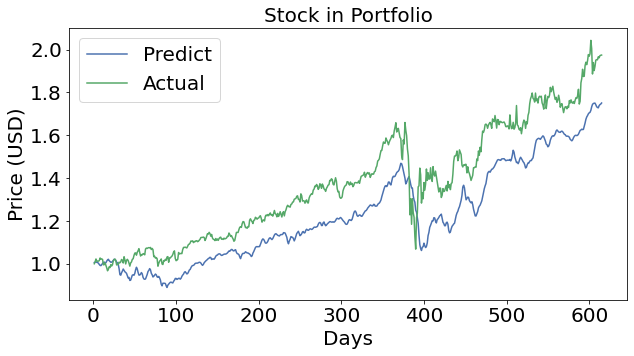

In [29]:
#---------------------------------------------------------------------------------------------#
plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(per_Pred1['per_Pred1'])

plt.plot(perreal_Pred1['PerReal_Pred1'])


plt.legend(['Predict','Actual'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('Stock in Portfolio', fontsize=20)
plt.show()

# Period 1 

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_43 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0044
Epoch 2/25
494/494 - 14s - loss: 0.0015
Epoch 3/25
494/494 - 14s - loss: 0.0013
Epoch 4/25
494/494 - 14s - loss: 0.0015
Epoch 5/25
494/494 - 14s - loss: 0.0012
Epoch 6/25
494/494 - 14s - loss: 0.0012
Epoch 7/25
494/494 - 14s - loss: 0.0013
Epoch 8/25

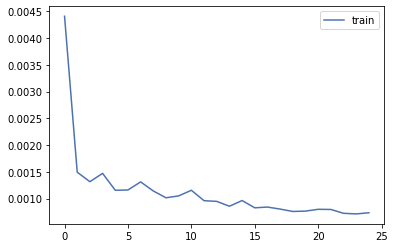

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_44 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_45 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0078
Epoch 2/25
494/494 - 14s - loss: 0.0040
Epoch 3/25
494/494 - 14s - loss: 0.0030
Epoch 4/25
494/494 - 14s - loss: 0.0032
Epoch 5/25
494/494 - 14s - loss: 0.0028
Epoch 6/25
494/494 - 14s - loss: 0.0028
Epoch 7/25
494/494 - 14s - loss: 0.0028
Epoch 8/25

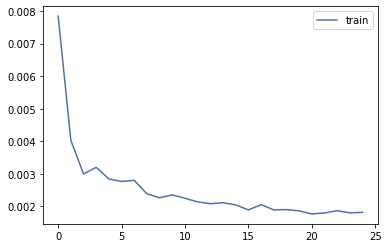

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_47 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0105
Epoch 2/25
494/494 - 15s - loss: 0.0050
Epoch 3/25
494/494 - 14s - loss: 0.0041
Epoch 4/25
494/494 - 14s - loss: 0.0043
Epoch 5/25
494/494 - 14s - loss: 0.0033
Epoch 6/25
494/494 - 14s - loss: 0.0038
Epoch 7/25
494/494 - 14s - loss: 0.0032
Epoch 8/25


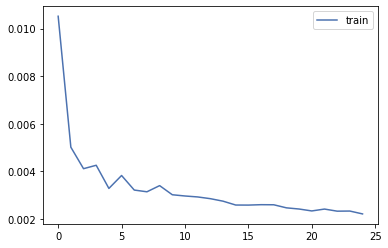

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_49 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0062
Epoch 2/25
494/494 - 14s - loss: 0.0024
Epoch 3/25
494/494 - 14s - loss: 0.0023
Epoch 4/25
494/494 - 14s - loss: 0.0024
Epoch 5/25
494/494 - 14s - loss: 0.0022
Epoch 6/25
494/494 - 14s - loss: 0.0020
Epoch 7/25
494/494 - 14s - loss: 0.0019
Epoch 8/25
4

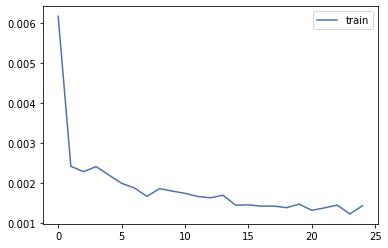

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_51 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0105
Epoch 2/25
494/494 - 14s - loss: 0.0049
Epoch 3/25
494/494 - 14s - loss: 0.0047
Epoch 4/25
494/494 - 17s - loss: 0.0048
Epoch 5/25
494/494 - 17s - loss: 0.0041
Epoch 6/25
494/494 - 14s - loss: 0.0041
Epoch 7/25
494/494 - 15s - loss: 0.0042
Epoch 8/25

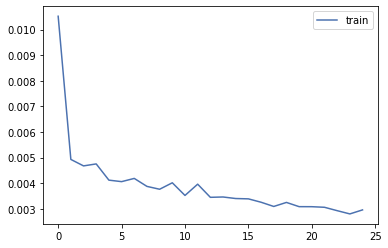

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_53 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0057
Epoch 2/25
494/494 - 14s - loss: 0.0029
Epoch 3/25
494/494 - 14s - loss: 0.0022
Epoch 4/25
494/494 - 14s - loss: 0.0023
Epoch 5/25
494/494 - 14s - loss: 0.0023
Epoch 6/25
494/494 - 14s - loss: 0.0021
Epoch 7/25
494/494 - 15s - loss: 0.0021
Epoch 8/25

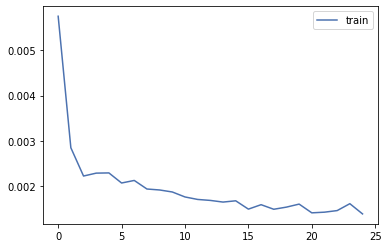

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_54 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_55 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0076
Epoch 2/25
494/494 - 14s - loss: 0.0026
Epoch 3/25
494/494 - 14s - loss: 0.0023
Epoch 4/25
494/494 - 14s - loss: 0.0024
Epoch 5/25
494/494 - 14s - loss: 0.0023
Epoch 6/25
494/494 - 15s - loss: 0.0021
Epoch 7/25
494/494 - 14s - loss: 0.0020
Epoch 8/25

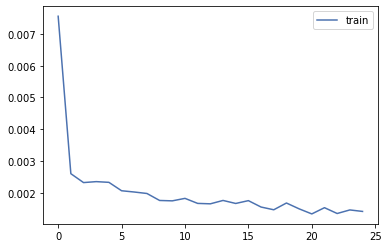

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_57 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0053
Epoch 2/25
494/494 - 14s - loss: 0.0019
Epoch 3/25
494/494 - 14s - loss: 0.0020
Epoch 4/25
494/494 - 14s - loss: 0.0017
Epoch 5/25
494/494 - 15s - loss: 0.0017
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0019
Epoch 8/25

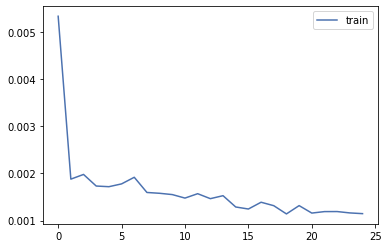

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_59 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0065
Epoch 2/25
494/494 - 15s - loss: 0.0035
Epoch 3/25
494/494 - 14s - loss: 0.0031
Epoch 4/25
494/494 - 14s - loss: 0.0031
Epoch 5/25
494/494 - 15s - loss: 0.0030
Epoch 6/25
494/494 - 14s - loss: 0.0029
Epoch 7/25
494/494 - 14s - loss: 0.0030
Epoch 8/25

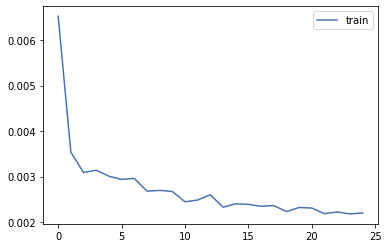

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_61 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0059
Epoch 2/25
494/494 - 17s - loss: 0.0025
Epoch 3/25
494/494 - 17s - loss: 0.0022
Epoch 4/25
494/494 - 14s - loss: 0.0020
Epoch 5/25
494/494 - 15s - loss: 0.0021
Epoch 6/25
494/494 - 14s - loss: 0.0018
Epoch 7/25
494/494 - 14s - loss: 0.0019
Epoch 8/25

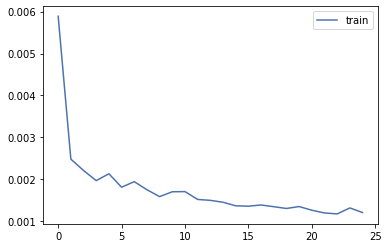

In [30]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
#NAME = ['LIN','SHW','APD','ECL','FCX','NEM','DD','PPG','IFF','BLL']

NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:L+100,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:L+100,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [31]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred2 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred2['NEE'].pct_change()
DUK_daily_returns = TEST_pred2['DUK'].pct_change()

SO_daily_returns = TEST_pred2['SO'].pct_change()
D_daily_returns = TEST_pred2['D'].pct_change()

EXC_daily_returns = TEST_pred2['EXC'].pct_change()
AEP_daily_returns = TEST_pred2['AEP'].pct_change()

SRE_daily_returns = TEST_pred2['SRE'].pct_change()
XEL_daily_returns = TEST_pred2['XEL'].pct_change()

PEG_daily_returns = TEST_pred2['PEG'].pct_change()
WEC_daily_returns = TEST_pred2['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred2 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred2 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred2 = TESTDailyReturn_pred2
atx_comps_rets_cumprod_pred2 = TESTCUM_pred2

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred2, x=atx_comps_rets_cumprod_pred2.index, y=atx_comps_rets_cumprod_pred2.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred2, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred2, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred2 = EfficientFrontier(mu, Sigma)
    ef_pred2.efficient_return(i)
    vol_ef.append(ef_pred2.portfolio_performance()[1])

ef_pred2 = EfficientFrontier(mu, Sigma)
ef_pred2.min_volatility()
min_vol_ret = ef_pred2.portfolio_performance()[0]
min_vol_vol = ef_pred2.portfolio_performance()[1]

ef_pred2.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred2.portfolio_performance()[0]
max_sharpe_vol = ef_pred2.portfolio_performance()[1]


portfolioREAL_Pred2 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)


Expected annual return: 3.2%
Annual volatility: 3.2%
Sharpe Ratio: 0.73


(0.03211216884164965, 0.031508746106049826, 0.7335159820025972)

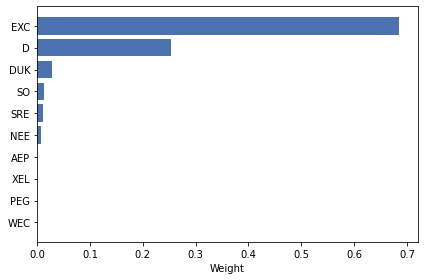

In [32]:

ef_pred2 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred2 = ef_pred2.min_volatility()

plot_weights(raw_weights_minvar_exp_pred2)
ef_pred2.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 10.9%
Annual volatility: 3.9%
Sharpe Ratio: 2.56


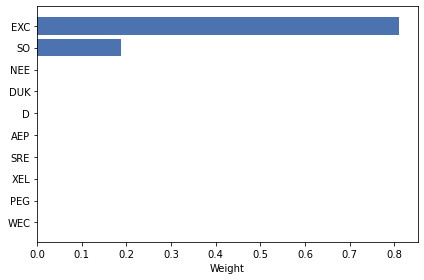

In [33]:
ef_pred2 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred2.max_sharpe(risk_free_rate=0.009)
Weight_Pred2  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred2,AV1_Pred2,SR1_Pred2=ef_pred2.portfolio_performance(verbose = True, risk_free_rate = 0.009)


In [34]:
Weight_Pred2= raw_weights_maxsharpe_exp.values()

LISTValue_Pred2= list(Weight_Pred2)

SUMpredict_Pred2 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred2))*np.mat(np.array(SUMpredict_Pred2))

per_Pred2 = pd.DataFrame(hhhhh.T,columns = ['per_Pred2'])



In [35]:
PortfolioREAL_Daily_Return_Pred2 = portfolioREAL_Pred2.pct_change()

PortfolioREAL_cum_returns_Pred2 = (PortfolioREAL_Daily_Return_Pred2 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred2))*(np.mat(np.array(LISTValue_Pred2)).T)

perreal_Pred2 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred2'])


# Period 2

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_62 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_63 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0038
Epoch 2/25
494/494 - 15s - loss: 0.0019
Epoch 3/25
494/494 - 14s - loss: 0.0014
Epoch 4/25
494/494 - 14s - loss: 0.0014
Epoch 5/25
494/494 - 14s - loss: 0.0013
Epoch 6/25
494/494 - 14s - loss: 0.0012
Epoch 7/25
494/494 - 14s - loss: 0.0012
Epoch 8/25

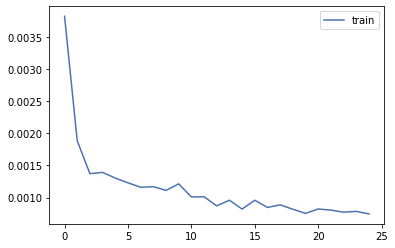

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_65 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0124
Epoch 2/25
494/494 - 14s - loss: 0.0040
Epoch 3/25
494/494 - 14s - loss: 0.0039
Epoch 4/25
494/494 - 14s - loss: 0.0037
Epoch 5/25
494/494 - 14s - loss: 0.0033
Epoch 6/25
494/494 - 14s - loss: 0.0037
Epoch 7/25
494/494 - 14s - loss: 0.0031
Epoch 8/25

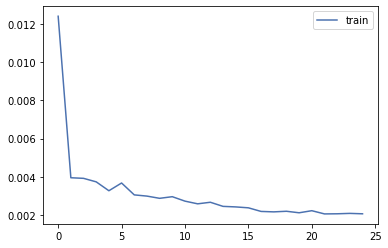

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_67 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0099
Epoch 2/25
494/494 - 15s - loss: 0.0042
Epoch 3/25
494/494 - 15s - loss: 0.0045
Epoch 4/25
494/494 - 15s - loss: 0.0041
Epoch 5/25
494/494 - 14s - loss: 0.0034
Epoch 6/25
494/494 - 14s - loss: 0.0038
Epoch 7/25
494/494 - 15s - loss: 0.0034
Epoch 8/25


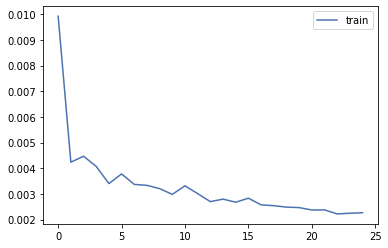

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_68 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_69 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 21s - loss: 0.0064
Epoch 2/25
494/494 - 18s - loss: 0.0027
Epoch 3/25
494/494 - 18s - loss: 0.0022
Epoch 4/25
494/494 - 15s - loss: 0.0022
Epoch 5/25
494/494 - 14s - loss: 0.0021
Epoch 6/25
494/494 - 14s - loss: 0.0022
Epoch 7/25
494/494 - 14s - loss: 0.0022
Epoch 8/25
4

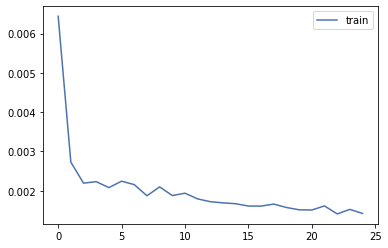

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_71 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0087
Epoch 2/25
494/494 - 14s - loss: 0.0049
Epoch 3/25
494/494 - 15s - loss: 0.0046
Epoch 4/25
494/494 - 14s - loss: 0.0048
Epoch 5/25
494/494 - 14s - loss: 0.0042
Epoch 6/25
494/494 - 14s - loss: 0.0038
Epoch 7/25
494/494 - 15s - loss: 0.0041
Epoch 8/25

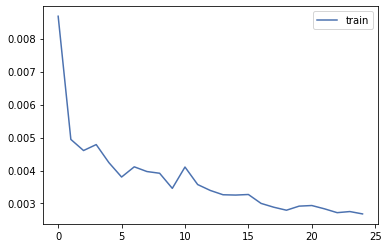

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_72 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_73 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0058
Epoch 2/25
494/494 - 14s - loss: 0.0026
Epoch 3/25
494/494 - 15s - loss: 0.0025
Epoch 4/25
494/494 - 14s - loss: 0.0021
Epoch 5/25
494/494 - 14s - loss: 0.0022
Epoch 6/25
494/494 - 14s - loss: 0.0020
Epoch 7/25
494/494 - 16s - loss: 0.0017
Epoch 8/25

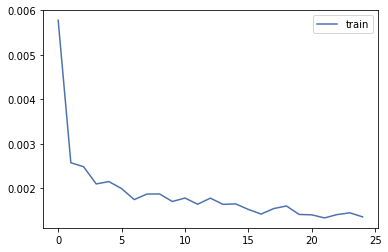

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_75 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0059
Epoch 2/25
494/494 - 14s - loss: 0.0031
Epoch 3/25
494/494 - 14s - loss: 0.0025
Epoch 4/25
494/494 - 14s - loss: 0.0031
Epoch 5/25
494/494 - 14s - loss: 0.0027
Epoch 6/25
494/494 - 14s - loss: 0.0023
Epoch 7/25
494/494 - 14s - loss: 0.0024
Epoch 8/25

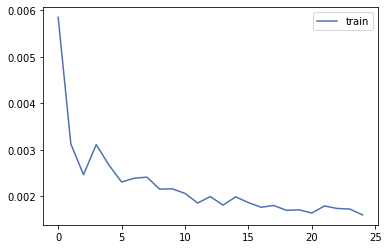

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_77 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0058
Epoch 2/25
494/494 - 14s - loss: 0.0022
Epoch 3/25
494/494 - 14s - loss: 0.0020
Epoch 4/25
494/494 - 14s - loss: 0.0018
Epoch 5/25
494/494 - 14s - loss: 0.0017
Epoch 6/25
494/494 - 15s - loss: 0.0017
Epoch 7/25
494/494 - 14s - loss: 0.0016
Epoch 8/25

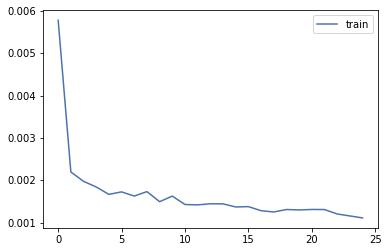

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_79 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0066
Epoch 2/25
494/494 - 14s - loss: 0.0041
Epoch 3/25
494/494 - 14s - loss: 0.0034
Epoch 4/25
494/494 - 14s - loss: 0.0036
Epoch 5/25
494/494 - 14s - loss: 0.0037
Epoch 6/25
494/494 - 14s - loss: 0.0032
Epoch 7/25
494/494 - 14s - loss: 0.0031
Epoch 8/25

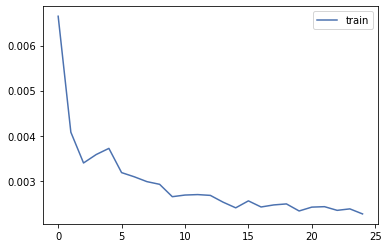

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_80 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_81 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0072
Epoch 2/25
494/494 - 16s - loss: 0.0024
Epoch 3/25
494/494 - 17s - loss: 0.0018
Epoch 4/25
494/494 - 16s - loss: 0.0021
Epoch 5/25
494/494 - 15s - loss: 0.0017
Epoch 6/25
494/494 - 16s - loss: 0.0015
Epoch 7/25
494/494 - 16s - loss: 0.0015
Epoch 8/25

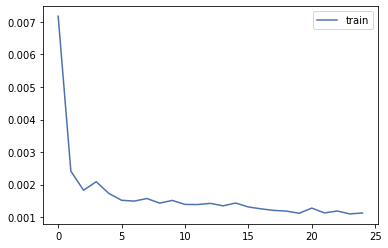

In [36]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
#NAME = ['LIN','SHW','APD','ECL','FCX','NEM','DD','PPG','IFF','BLL']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+100:L+200,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[100:L+100,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+100:L+200,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [37]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred3 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred3['NEE'].pct_change()
DUK_daily_returns = TEST_pred3['DUK'].pct_change()

SO_daily_returns = TEST_pred3['SO'].pct_change()
D_daily_returns = TEST_pred3['D'].pct_change()

EXC_daily_returns = TEST_pred3['EXC'].pct_change()
AEP_daily_returns = TEST_pred3['AEP'].pct_change()

SRE_daily_returns = TEST_pred3['SRE'].pct_change()
XEL_daily_returns = TEST_pred3['XEL'].pct_change()

PEG_daily_returns = TEST_pred3['PEG'].pct_change()
WEC_daily_returns = TEST_pred3['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred3 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred3 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred3 = TESTDailyReturn_pred3
atx_comps_rets_cumprod_pred3 = TESTCUM_pred3

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred3, x=atx_comps_rets_cumprod_pred3.index, y=atx_comps_rets_cumprod_pred3.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred3, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred3, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred3 = EfficientFrontier(mu, Sigma)
    ef_pred3.efficient_return(i)
    vol_ef.append(ef_pred3.portfolio_performance()[1])

ef_pred3 = EfficientFrontier(mu, Sigma)
ef_pred3.min_volatility()
min_vol_ret = ef_pred3.portfolio_performance()[0]
min_vol_vol = ef_pred3.portfolio_performance()[1]

ef_pred3.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred3.portfolio_performance()[0]
max_sharpe_vol = ef_pred3.portfolio_performance()[1]


portfolioREAL_Pred3 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)




Expected annual return: 11.0%
Annual volatility: 1.3%
Sharpe Ratio: 7.55


(0.11014032334960656, 0.013392049358858852, 7.552266321562066)

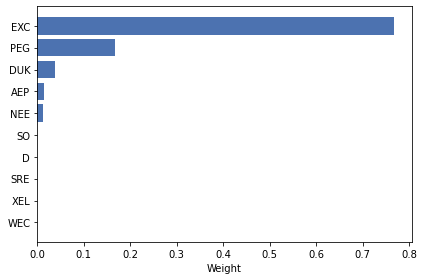

In [38]:

ef_pred3 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred3 = ef_pred3.min_volatility()

plot_weights(raw_weights_minvar_exp_pred3)
ef_pred3.portfolio_performance(verbose = True, risk_free_rate = 0.009)



Expected annual return: 24.5%
Annual volatility: 2.1%
Sharpe Ratio: 11.17


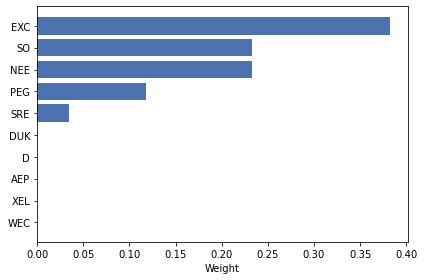

In [39]:


ef_pred3 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred3.max_sharpe(risk_free_rate=0.009)
Weight_Pred3  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred3,AV1_Pred3,SR1_Pred3=ef_pred3.portfolio_performance(verbose = True, risk_free_rate = 0.009)



In [40]:


Weight_Pred3= raw_weights_maxsharpe_exp.values()

LISTValue_Pred3= list(Weight_Pred3)

SUMpredict_Pred3 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred3))*np.mat(np.array(SUMpredict_Pred3))

per_Pred3 = pd.DataFrame(hhhhh.T,columns = ['per_Pred3'])



PortfolioREAL_Daily_Return_Pred3 = portfolioREAL_Pred3.pct_change()

PortfolioREAL_cum_returns_Pred3 = (PortfolioREAL_Daily_Return_Pred3 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred3))*(np.mat(np.array(LISTValue_Pred3)).T)

perreal_Pred3 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred3'])

# period 3

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_82 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_83 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 22s - loss: 0.0041
Epoch 2/25
494/494 - 16s - loss: 0.0021
Epoch 3/25
494/494 - 17s - loss: 0.0014
Epoch 4/25
494/494 - 17s - loss: 0.0013
Epoch 5/25
494/494 - 18s - loss: 0.0012
Epoch 6/25
494/494 - 17s - loss: 0.0011
Epoch 7/25
494/494 - 18s - loss: 0.0010
Epoch 8/25

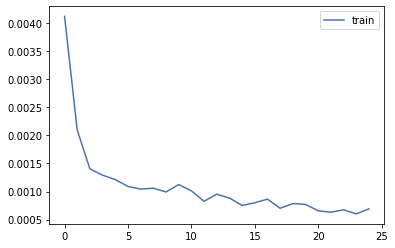

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_85 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0124
Epoch 2/25
494/494 - 17s - loss: 0.0053
Epoch 3/25
494/494 - 16s - loss: 0.0046
Epoch 4/25
494/494 - 17s - loss: 0.0043
Epoch 5/25
494/494 - 16s - loss: 0.0040
Epoch 6/25
494/494 - 18s - loss: 0.0037
Epoch 7/25
494/494 - 16s - loss: 0.0038
Epoch 8/25

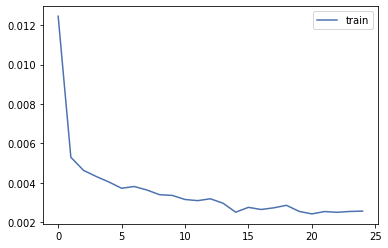

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_87 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 22s - loss: 0.0146
Epoch 2/25
494/494 - 18s - loss: 0.0049
Epoch 3/25
494/494 - 18s - loss: 0.0044
Epoch 4/25
494/494 - 15s - loss: 0.0043
Epoch 5/25
494/494 - 14s - loss: 0.0048
Epoch 6/25
494/494 - 14s - loss: 0.0038
Epoch 7/25
494/494 - 14s - loss: 0.0042
Epoch 8/25


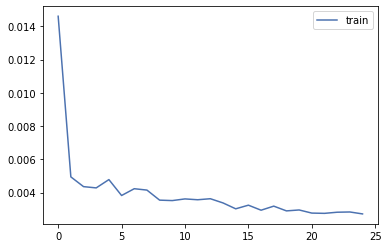

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_89 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0088
Epoch 2/25
494/494 - 15s - loss: 0.0030
Epoch 3/25
494/494 - 14s - loss: 0.0030
Epoch 4/25
494/494 - 14s - loss: 0.0024
Epoch 5/25
494/494 - 14s - loss: 0.0023
Epoch 6/25
494/494 - 14s - loss: 0.0025
Epoch 7/25
494/494 - 14s - loss: 0.0023
Epoch 8/25
4

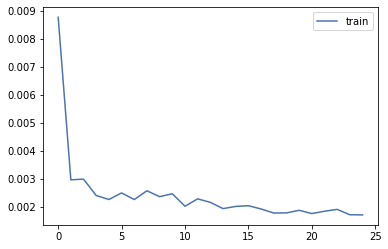

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_91 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 20s - loss: 0.0123
Epoch 2/25
494/494 - 17s - loss: 0.0056
Epoch 3/25
494/494 - 18s - loss: 0.0051
Epoch 4/25
494/494 - 17s - loss: 0.0049
Epoch 5/25
494/494 - 21s - loss: 0.0044
Epoch 6/25
494/494 - 17s - loss: 0.0043
Epoch 7/25
494/494 - 15s - loss: 0.0044
Epoch 8/25

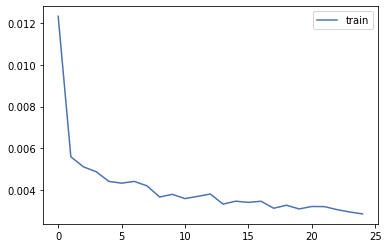

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_92 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_93 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0052
Epoch 2/25
494/494 - 15s - loss: 0.0030
Epoch 3/25
494/494 - 15s - loss: 0.0022
Epoch 4/25
494/494 - 17s - loss: 0.0019
Epoch 5/25
494/494 - 16s - loss: 0.0019
Epoch 6/25
494/494 - 16s - loss: 0.0019
Epoch 7/25
494/494 - 18s - loss: 0.0020
Epoch 8/25

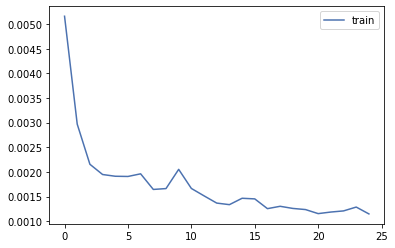

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_94 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_95 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0065
Epoch 2/25
494/494 - 15s - loss: 0.0025
Epoch 3/25
494/494 - 15s - loss: 0.0023
Epoch 4/25
494/494 - 18s - loss: 0.0022
Epoch 5/25
494/494 - 17s - loss: 0.0023
Epoch 6/25
494/494 - 16s - loss: 0.0018
Epoch 7/25
494/494 - 22s - loss: 0.0018
Epoch 8/25

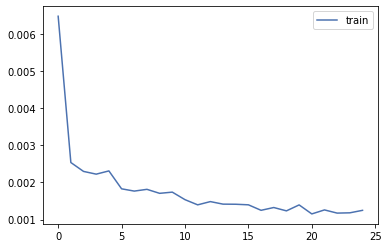

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_97 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0072
Epoch 2/25
494/494 - 15s - loss: 0.0023
Epoch 3/25
494/494 - 15s - loss: 0.0018
Epoch 4/25
494/494 - 17s - loss: 0.0016
Epoch 5/25
494/494 - 18s - loss: 0.0017
Epoch 6/25
494/494 - 17s - loss: 0.0018
Epoch 7/25
494/494 - 19s - loss: 0.0017
Epoch 8/25

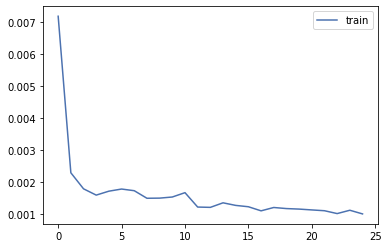

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_98 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_99 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0060
Epoch 2/25
494/494 - 16s - loss: 0.0038
Epoch 3/25
494/494 - 18s - loss: 0.0038
Epoch 4/25
494/494 - 14s - loss: 0.0030
Epoch 5/25
494/494 - 17s - loss: 0.0034
Epoch 6/25
494/494 - 14s - loss: 0.0028
Epoch 7/25
494/494 - 14s - loss: 0.0028
Epoch 8/25

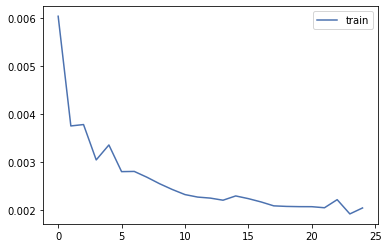

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_100 (LSTM)              (None, 35, 250)           252000    
_________________________________________________________________
lstm_101 (LSTM)              (None, 250)               501000    
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0061
Epoch 2/25
494/494 - 18s - loss: 0.0024
Epoch 3/25
494/494 - 18s - loss: 0.0015
Epoch 4/25
494/494 - 18s - loss: 0.0018
Epoch 5/25
494/494 - 18s - loss: 0.0016
Epoch 6/25
494/494 - 17s - loss: 0.0016
Epoch 7/25
494/494 - 15s - loss: 0.0015
Epoch 8/25

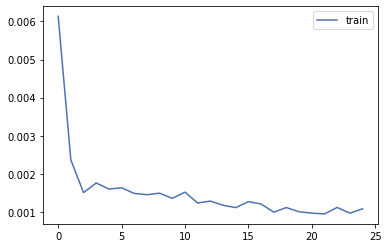

In [41]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+200:L+300,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[200:L+200,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+200:L+300,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [42]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred4 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred4['NEE'].pct_change()
DUK_daily_returns = TEST_pred4['DUK'].pct_change()

SO_daily_returns = TEST_pred4['SO'].pct_change()
D_daily_returns = TEST_pred4['D'].pct_change()

EXC_daily_returns = TEST_pred4['EXC'].pct_change()
AEP_daily_returns = TEST_pred4['AEP'].pct_change()

SRE_daily_returns = TEST_pred4['SRE'].pct_change()
XEL_daily_returns = TEST_pred4['XEL'].pct_change()

PEG_daily_returns = TEST_pred4['PEG'].pct_change()
WEC_daily_returns = TEST_pred4['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred4 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred4 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred4 = TESTDailyReturn_pred4
atx_comps_rets_cumprod_pred4 = TESTCUM_pred4

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred4, x=atx_comps_rets_cumprod_pred4.index, y=atx_comps_rets_cumprod_pred4.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred4, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred4, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred4 = EfficientFrontier(mu, Sigma)
    ef_pred4.efficient_return(i)
    vol_ef.append(ef_pred4.portfolio_performance()[1])

ef_pred4 = EfficientFrontier(mu, Sigma)
ef_pred4.min_volatility()
min_vol_ret = ef_pred4.portfolio_performance()[0]
min_vol_vol = ef_pred4.portfolio_performance()[1]

ef_pred4.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred4.portfolio_performance()[0]
max_sharpe_vol = ef_pred4.portfolio_performance()[1]


portfolioREAL_Pred4 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)













Expected annual return: 15.0%
Annual volatility: 3.3%
Sharpe Ratio: 4.25


(0.15009119305071517, 0.03320262527894664, 4.249398710654945)

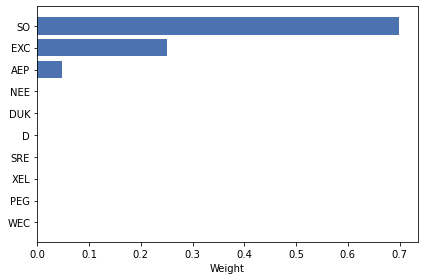

In [43]:

ef_pred4 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred4 = ef_pred4.min_volatility()

plot_weights(raw_weights_minvar_exp_pred4)
ef_pred4.portfolio_performance(verbose = True, risk_free_rate = 0.009)


Expected annual return: 26.4%
Annual volatility: 3.9%
Sharpe Ratio: 6.48


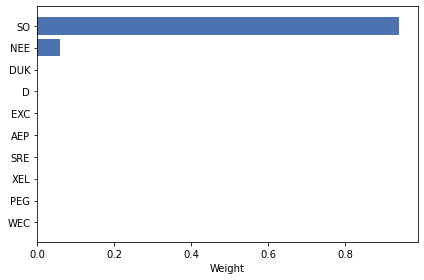

In [44]:


ef_pred4 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred4.max_sharpe(risk_free_rate=0.009)
Weight_Pred4  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred4,AV1_Pred4,SR1_Pred4=ef_pred4.portfolio_performance(verbose = True, risk_free_rate = 0.009)





In [45]:


Weight_Pred4= raw_weights_maxsharpe_exp.values()

LISTValue_Pred4= list(Weight_Pred4)

SUMpredict_Pred4 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred4))*np.mat(np.array(SUMpredict_Pred4))

per_Pred4 = pd.DataFrame(hhhhh.T,columns = ['per_Pred4'])



PortfolioREAL_Daily_Return_Pred4 = portfolioREAL_Pred4.pct_change()

PortfolioREAL_cum_returns_Pred4 = (PortfolioREAL_Daily_Return_Pred4 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred4))*(np.mat(np.array(LISTValue_Pred4)).T)

perreal_Pred4 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred4'])


# Period 4 有可能不行

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_154 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_155 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0045
Epoch 2/25
494/494 - 8s - loss: 0.0017
Epoch 3/25
494/494 - 8s - loss: 8.2772e-04
Epoch 4/25
494/494 - 8s - loss: 0.0013
Epoch 5/25
494/494 - 9s - loss: 8.3532e-04
Epoch 6/25
494/494 - 8s - loss: 8.7343e-04
Epoch 7/25
494/494 - 8s - loss: 8.7046e-04


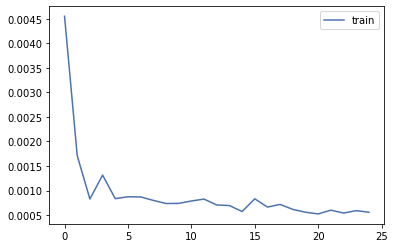

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_157 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0083
Epoch 2/25
494/494 - 8s - loss: 0.0038
Epoch 3/25
494/494 - 8s - loss: 0.0034
Epoch 4/25
494/494 - 8s - loss: 0.0034
Epoch 5/25
494/494 - 8s - loss: 0.0030
Epoch 6/25
494/494 - 8s - loss: 0.0030
Epoch 7/25
494/494 - 8s - loss: 0.0029
Epoch 8/25
494/4

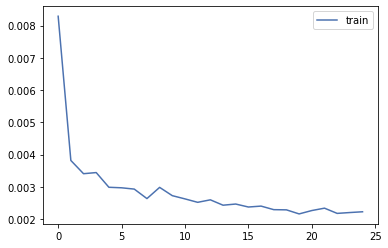

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_158 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_159 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0071
Epoch 2/25
494/494 - 8s - loss: 0.0033
Epoch 3/25
494/494 - 8s - loss: 0.0029
Epoch 4/25
494/494 - 8s - loss: 0.0028
Epoch 5/25
494/494 - 8s - loss: 0.0028
Epoch 6/25
494/494 - 8s - loss: 0.0026
Epoch 7/25
494/494 - 8s - loss: 0.0024
Epoch 8/25
494/49

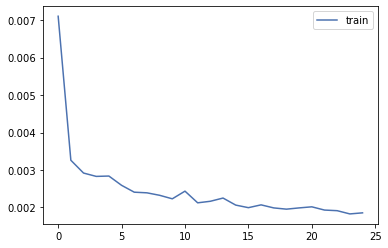

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_160 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_161 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0100
Epoch 2/25
494/494 - 8s - loss: 0.0034
Epoch 3/25
494/494 - 8s - loss: 0.0031
Epoch 4/25
494/494 - 8s - loss: 0.0026
Epoch 5/25
494/494 - 8s - loss: 0.0025
Epoch 6/25
494/494 - 8s - loss: 0.0030
Epoch 7/25
494/494 - 8s - loss: 0.0027
Epoch 8/25
494/494

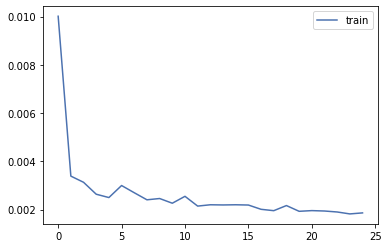

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_162 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_163 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0119
Epoch 2/25
494/494 - 8s - loss: 0.0055
Epoch 3/25
494/494 - 8s - loss: 0.0049
Epoch 4/25
494/494 - 8s - loss: 0.0045
Epoch 5/25
494/494 - 8s - loss: 0.0046
Epoch 6/25
494/494 - 8s - loss: 0.0044
Epoch 7/25
494/494 - 8s - loss: 0.0042
Epoch 8/25
494/4

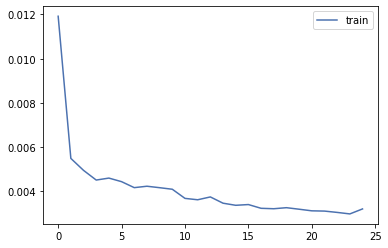

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_164 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_165 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0049
Epoch 2/25
494/494 - 8s - loss: 0.0017
Epoch 3/25
494/494 - 8s - loss: 0.0021
Epoch 4/25
494/494 - 8s - loss: 0.0019
Epoch 5/25
494/494 - 8s - loss: 0.0018
Epoch 6/25
494/494 - 8s - loss: 0.0015
Epoch 7/25
494/494 - 8s - loss: 0.0014
Epoch 8/25
494/4

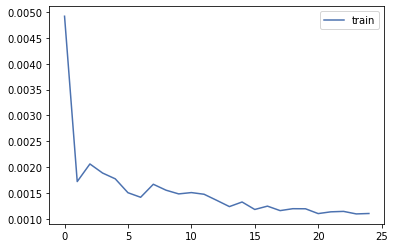

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_166 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_167 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0060
Epoch 2/25
494/494 - 8s - loss: 0.0023
Epoch 3/25
494/494 - 8s - loss: 0.0019
Epoch 4/25
494/494 - 8s - loss: 0.0017
Epoch 5/25
494/494 - 8s - loss: 0.0017
Epoch 6/25
494/494 - 8s - loss: 0.0017
Epoch 7/25
494/494 - 8s - loss: 0.0015
Epoch 8/25
494/4

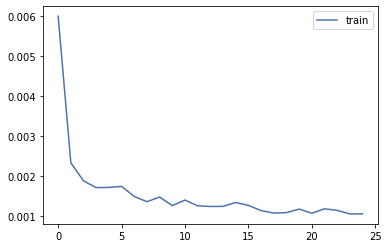

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_168 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_169 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0054
Epoch 2/25
494/494 - 8s - loss: 0.0016
Epoch 3/25
494/494 - 8s - loss: 0.0019
Epoch 4/25
494/494 - 8s - loss: 0.0015
Epoch 5/25
494/494 - 8s - loss: 0.0015
Epoch 6/25
494/494 - 8s - loss: 0.0014
Epoch 7/25
494/494 - 8s - loss: 0.0013
Epoch 8/25
494/4

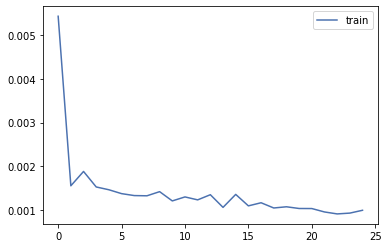

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_170 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_171 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0062
Epoch 2/25
494/494 - 8s - loss: 0.0030
Epoch 3/25
494/494 - 8s - loss: 0.0028
Epoch 4/25
494/494 - 8s - loss: 0.0027
Epoch 5/25
494/494 - 8s - loss: 0.0025
Epoch 6/25
494/494 - 8s - loss: 0.0027
Epoch 7/25
494/494 - 8s - loss: 0.0028
Epoch 8/25
494/4

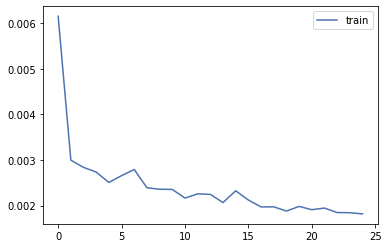

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_172 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_173 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0048
Epoch 2/25
494/494 - 8s - loss: 0.0017
Epoch 3/25
494/494 - 8s - loss: 0.0013
Epoch 4/25
494/494 - 8s - loss: 0.0013
Epoch 5/25
494/494 - 8s - loss: 0.0012
Epoch 6/25
494/494 - 8s - loss: 0.0014
Epoch 7/25
494/494 - 8s - loss: 0.0013
Epoch 8/25
494/4

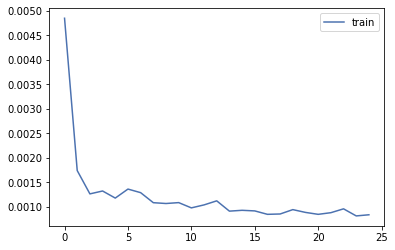

In [57]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+300:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[300:L+300,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+300:L+400,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [58]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred5 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred5['NEE'].pct_change()
DUK_daily_returns = TEST_pred5['DUK'].pct_change()

SO_daily_returns = TEST_pred5['SO'].pct_change()
D_daily_returns = TEST_pred5['D'].pct_change()

EXC_daily_returns = TEST_pred5['EXC'].pct_change()
AEP_daily_returns = TEST_pred5['AEP'].pct_change()

SRE_daily_returns = TEST_pred5['SRE'].pct_change()
XEL_daily_returns = TEST_pred5['XEL'].pct_change()

PEG_daily_returns = TEST_pred5['PEG'].pct_change()
WEC_daily_returns = TEST_pred5['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred5 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred5 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred5 = TESTDailyReturn_pred5
atx_comps_rets_cumprod_pred5 = TESTCUM_pred5

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred5, x=atx_comps_rets_cumprod_pred5.index, y=atx_comps_rets_cumprod_pred5.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred5, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred5, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred5 = EfficientFrontier(mu, Sigma)
    ef_pred5.efficient_return(i)
    vol_ef.append(ef_pred5.portfolio_performance()[1])

ef_pred5 = EfficientFrontier(mu, Sigma)
ef_pred5.min_volatility()
min_vol_ret = ef_pred5.portfolio_performance()[0]
min_vol_vol = ef_pred5.portfolio_performance()[1]

ef_pred5.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred5.portfolio_performance()[0]
max_sharpe_vol = ef_pred5.portfolio_performance()[1]


portfolioREAL_Pred5 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)



OptimizationError: ('Please check your objectives/constraints or use a different solver.', 'Solver status: infeasible')

In [ ]:

ef_pred5 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred5 = ef_pred5.min_volatility()

plot_weights(raw_weights_minvar_exp_pred5)
ef_pred5.portfolio_performance(verbose = True, risk_free_rate = 0.009)







In [ ]:

ef_pred5 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred5.max_sharpe(risk_free_rate=0.009)
Weight_Pred5 = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred5,AV1_Pred5,SR1_Pred5=ef_pred5.portfolio_performance(verbose = True, risk_free_rate = 0.009)





In [ ]:


Weight_Pred5= raw_weights_maxsharpe_exp.values()

LISTValue_Pred5= list(Weight_Pred5)

SUMpredict_Pred5 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred5))*np.mat(np.array(SUMpredict_Pred5))

per_Pred5 = pd.DataFrame(hhhhh.T,columns = ['per_Pred5'])



PortfolioREAL_Daily_Return_Pred5 = portfolioREAL_Pred5.pct_change()

PortfolioREAL_cum_returns_Pred5 = (PortfolioREAL_Daily_Return_Pred5 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred5))*(np.mat(np.array(LISTValue_Pred5)).T)

perreal_Pred5 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred5'])


# Period 5

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_114 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_115 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 14s - loss: 0.0034
Epoch 2/25
494/494 - 9s - loss: 0.0019
Epoch 3/25
494/494 - 9s - loss: 0.0017
Epoch 4/25
494/494 - 10s - loss: 0.0012
Epoch 5/25
494/494 - 10s - loss: 0.0013
Epoch 6/25
494/494 - 10s - loss: 0.0013
Epoch 7/25
494/494 - 10s - loss: 0.0012
Epoch 8/25
4

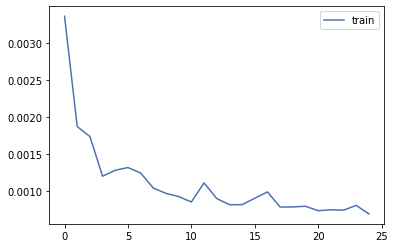

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_116 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_117 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0071
Epoch 2/25
494/494 - 8s - loss: 0.0042
Epoch 3/25
494/494 - 8s - loss: 0.0039
Epoch 4/25
494/494 - 8s - loss: 0.0035
Epoch 5/25
494/494 - 8s - loss: 0.0035
Epoch 6/25
494/494 - 8s - loss: 0.0034
Epoch 7/25
494/494 - 8s - loss: 0.0032
Epoch 8/25
494/4

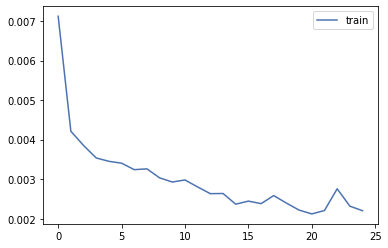

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_118 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_119 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 10s - loss: 0.0077
Epoch 2/25
494/494 - 9s - loss: 0.0034
Epoch 3/25
494/494 - 8s - loss: 0.0037
Epoch 4/25
494/494 - 8s - loss: 0.0032
Epoch 5/25
494/494 - 8s - loss: 0.0035
Epoch 6/25
494/494 - 8s - loss: 0.0028
Epoch 7/25
494/494 - 8s - loss: 0.0035
Epoch 8/25
494/49

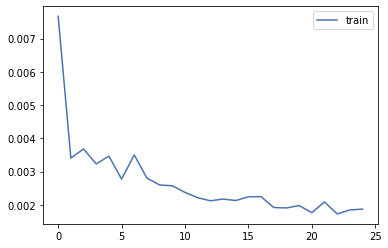

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_120 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_121 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0078
Epoch 2/25
494/494 - 9s - loss: 0.0034
Epoch 3/25
494/494 - 8s - loss: 0.0039
Epoch 4/25
494/494 - 8s - loss: 0.0030
Epoch 5/25
494/494 - 8s - loss: 0.0029
Epoch 6/25
494/494 - 11s - loss: 0.0027
Epoch 7/25
494/494 - 10s - loss: 0.0028
Epoch 8/25
494/4

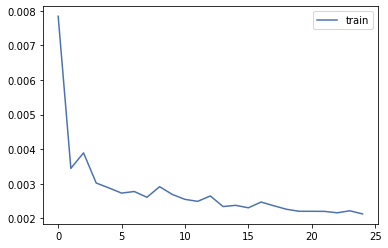

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_122 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_123 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0137
Epoch 2/25
494/494 - 9s - loss: 0.0073
Epoch 3/25
494/494 - 9s - loss: 0.0071
Epoch 4/25
494/494 - 9s - loss: 0.0065
Epoch 5/25
494/494 - 10s - loss: 0.0060
Epoch 6/25
494/494 - 9s - loss: 0.0055
Epoch 7/25
494/494 - 9s - loss: 0.0055
Epoch 8/25
494/

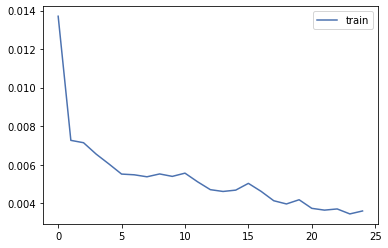

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_124 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_125 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 14s - loss: 0.0054
Epoch 2/25
494/494 - 10s - loss: 0.0026
Epoch 3/25
494/494 - 10s - loss: 0.0019
Epoch 4/25
494/494 - 9s - loss: 0.0017
Epoch 5/25
494/494 - 9s - loss: 0.0020
Epoch 6/25
494/494 - 10s - loss: 0.0018
Epoch 7/25
494/494 - 10s - loss: 0.0016
Epoch 8/25
4

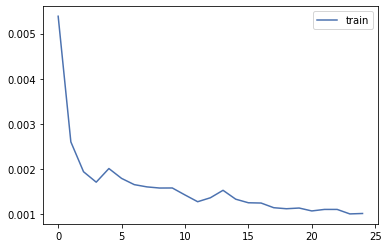

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_126 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_127 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 12s - loss: 0.0066
Epoch 2/25
494/494 - 11s - loss: 0.0036
Epoch 3/25
494/494 - 12s - loss: 0.0032
Epoch 4/25
494/494 - 12s - loss: 0.0031
Epoch 5/25
494/494 - 11s - loss: 0.0027
Epoch 6/25
494/494 - 11s - loss: 0.0023
Epoch 7/25
494/494 - 10s - loss: 0.0023
Epoch 8/25

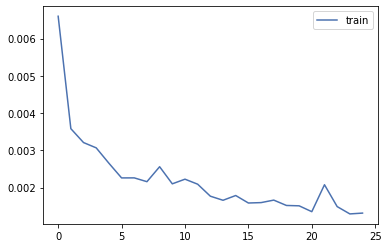

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_128 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_129 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 12s - loss: 0.0048
Epoch 2/25
494/494 - 10s - loss: 0.0022
Epoch 3/25
494/494 - 10s - loss: 0.0018
Epoch 4/25
494/494 - 10s - loss: 0.0016
Epoch 5/25
494/494 - 9s - loss: 0.0015
Epoch 6/25
494/494 - 9s - loss: 0.0016
Epoch 7/25
494/494 - 9s - loss: 0.0015
Epoch 8/25
49

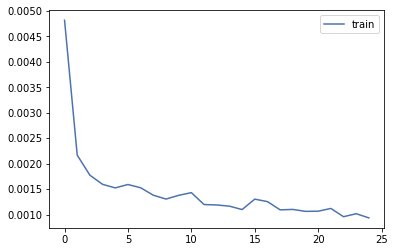

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_130 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_131 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 15s - loss: 0.0090
Epoch 2/25
494/494 - 11s - loss: 0.0057
Epoch 3/25
494/494 - 10s - loss: 0.0051
Epoch 4/25
494/494 - 10s - loss: 0.0044
Epoch 5/25
494/494 - 9s - loss: 0.0044
Epoch 6/25
494/494 - 9s - loss: 0.0043
Epoch 7/25
494/494 - 9s - loss: 0.0041
Epoch 8/25
49

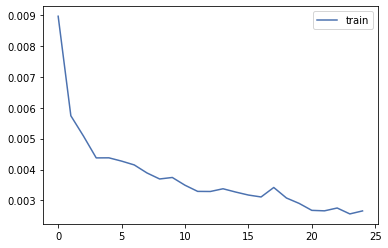

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_132 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_133 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0040
Epoch 2/25
494/494 - 9s - loss: 0.0016
Epoch 3/25
494/494 - 9s - loss: 0.0016
Epoch 4/25
494/494 - 9s - loss: 0.0019
Epoch 5/25
494/494 - 8s - loss: 0.0014
Epoch 6/25
494/494 - 8s - loss: 0.0012
Epoch 7/25
494/494 - 8s - loss: 0.0013
Epoch 8/25
494/4

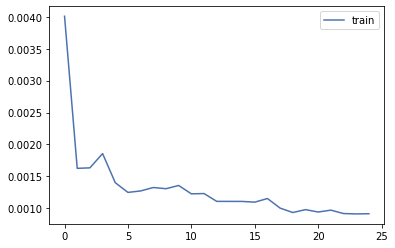

In [47]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+400:L+500,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[400:L+400,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+400:L+500,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [48]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred6 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred6['NEE'].pct_change()
DUK_daily_returns = TEST_pred6['DUK'].pct_change()

SO_daily_returns = TEST_pred6['SO'].pct_change()
D_daily_returns = TEST_pred6['D'].pct_change()

EXC_daily_returns = TEST_pred6['EXC'].pct_change()
AEP_daily_returns = TEST_pred6['AEP'].pct_change()

SRE_daily_returns = TEST_pred6['SRE'].pct_change()
XEL_daily_returns = TEST_pred6['XEL'].pct_change()

PEG_daily_returns = TEST_pred6['PEG'].pct_change()
WEC_daily_returns = TEST_pred6['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred6 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred6 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred6 = TESTDailyReturn_pred6
atx_comps_rets_cumprod_pred6 = TESTCUM_pred6

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred6, x=atx_comps_rets_cumprod_pred6.index, y=atx_comps_rets_cumprod_pred6.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred6, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred6, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred6 = EfficientFrontier(mu, Sigma)
    ef_pred6.efficient_return(i)
    vol_ef.append(ef_pred6.portfolio_performance()[1])

ef_pred6 = EfficientFrontier(mu, Sigma)
ef_pred6.min_volatility()
min_vol_ret = ef_pred6.portfolio_performance()[0]
min_vol_vol = ef_pred6.portfolio_performance()[1]

ef_pred6.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred6.portfolio_performance()[0]
max_sharpe_vol = ef_pred6.portfolio_performance()[1]


portfolioREAL_Pred6 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)





















Expected annual return: 22.8%
Annual volatility: 3.8%
Sharpe Ratio: 5.74


(0.2284168287597797, 0.03822421639779643, 5.740257078819508)

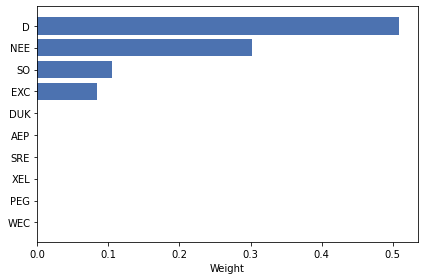

In [49]:









ef_pred6 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred6 = ef_pred6.min_volatility()

plot_weights(raw_weights_minvar_exp_pred6)
ef_pred6.portfolio_performance(verbose = True, risk_free_rate = 0.009)







Expected annual return: 37.2%
Annual volatility: 4.7%
Sharpe Ratio: 7.75


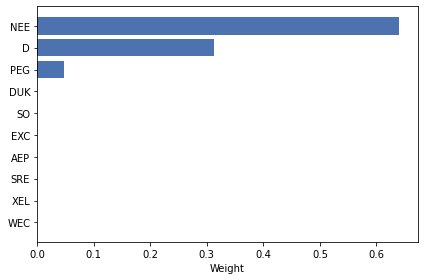

In [50]:

ef_pred6 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred6.max_sharpe(risk_free_rate=0.009)
Weight_Pred6  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred6,AV1_Pred6,SR1_Pred6=ef_pred6.portfolio_performance(verbose = True, risk_free_rate = 0.009)






In [51]:

Weight_Pred6= raw_weights_maxsharpe_exp.values()

LISTValue_Pred6= list(Weight_Pred6)

SUMpredict_Pred6 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred6))*np.mat(np.array(SUMpredict_Pred6))

per_Pred6 = pd.DataFrame(hhhhh.T,columns = ['per_Pred6'])



PortfolioREAL_Daily_Return_Pred6 = portfolioREAL_Pred6.pct_change()

PortfolioREAL_cum_returns_Pred6 = (PortfolioREAL_Daily_Return_Pred6 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred6))*(np.mat(np.array(LISTValue_Pred6)).T)

perreal_Pred6 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred6'])

# Period 6

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_134 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_135 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 12s - loss: 0.0034
Epoch 2/25
494/494 - 10s - loss: 0.0017
Epoch 3/25
494/494 - 10s - loss: 0.0024
Epoch 4/25
494/494 - 10s - loss: 0.0013
Epoch 5/25
494/494 - 9s - loss: 0.0015
Epoch 6/25
494/494 - 10s - loss: 0.0012
Epoch 7/25
494/494 - 10s - loss: 0.0013
Epoch 8/25


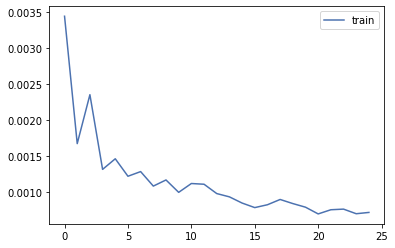

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_136 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_137 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 14s - loss: 0.0091
Epoch 2/25
494/494 - 11s - loss: 0.0061
Epoch 3/25
494/494 - 11s - loss: 0.0046
Epoch 4/25
494/494 - 10s - loss: 0.0048
Epoch 5/25
494/494 - 10s - loss: 0.0044
Epoch 6/25
494/494 - 9s - loss: 0.0046
Epoch 7/25
494/494 - 8s - loss: 0.0042
Epoch 8/25
4

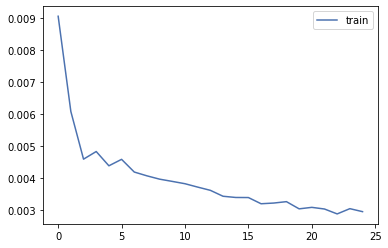

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_138 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_139 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 13s - loss: 0.0095
Epoch 2/25
494/494 - 11s - loss: 0.0047
Epoch 3/25
494/494 - 11s - loss: 0.0042
Epoch 4/25
494/494 - 10s - loss: 0.0042
Epoch 5/25
494/494 - 11s - loss: 0.0040
Epoch 6/25
494/494 - 11s - loss: 0.0039
Epoch 7/25
494/494 - 11s - loss: 0.0037
Epoch 8/25


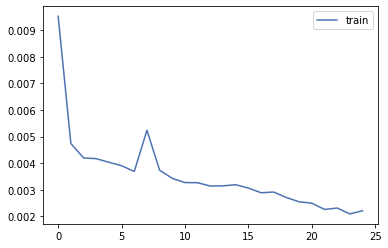

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_140 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_141 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 13s - loss: 0.0094
Epoch 2/25
494/494 - 10s - loss: 0.0043
Epoch 3/25
494/494 - 10s - loss: 0.0042
Epoch 4/25
494/494 - 10s - loss: 0.0037
Epoch 5/25
494/494 - 10s - loss: 0.0036
Epoch 6/25
494/494 - 9s - loss: 0.0034
Epoch 7/25
494/494 - 9s - loss: 0.0037
Epoch 8/25
494

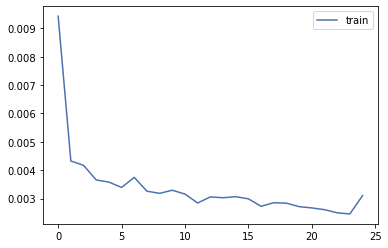

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_142 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_143 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_71 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 13s - loss: 0.0143
Epoch 2/25
494/494 - 10s - loss: 0.0073
Epoch 3/25
494/494 - 10s - loss: 0.0070
Epoch 4/25
494/494 - 9s - loss: 0.0064
Epoch 5/25
494/494 - 8s - loss: 0.0058
Epoch 6/25
494/494 - 8s - loss: 0.0060
Epoch 7/25
494/494 - 8s - loss: 0.0060
Epoch 8/25
494

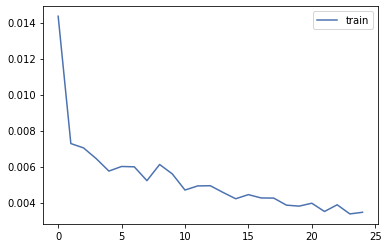

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_144 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_145 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0064
Epoch 2/25
494/494 - 8s - loss: 0.0028
Epoch 3/25
494/494 - 8s - loss: 0.0024
Epoch 4/25
494/494 - 8s - loss: 0.0023
Epoch 5/25
494/494 - 9s - loss: 0.0023
Epoch 6/25
494/494 - 8s - loss: 0.0020
Epoch 7/25
494/494 - 8s - loss: 0.0020
Epoch 8/25
494/4

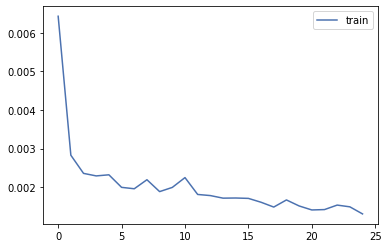

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_146 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_147 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 11s - loss: 0.0064
Epoch 2/25
494/494 - 10s - loss: 0.0036
Epoch 3/25
494/494 - 9s - loss: 0.0029
Epoch 4/25
494/494 - 9s - loss: 0.0029
Epoch 5/25
494/494 - 9s - loss: 0.0026
Epoch 6/25
494/494 - 9s - loss: 0.0028
Epoch 7/25
494/494 - 9s - loss: 0.0026
Epoch 8/25
494/

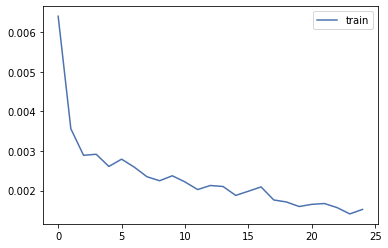

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_148 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_149 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 12s - loss: 0.0048
Epoch 2/25
494/494 - 9s - loss: 0.0021
Epoch 3/25
494/494 - 9s - loss: 0.0021
Epoch 4/25
494/494 - 9s - loss: 0.0021
Epoch 5/25
494/494 - 9s - loss: 0.0017
Epoch 6/25
494/494 - 8s - loss: 0.0019
Epoch 7/25
494/494 - 9s - loss: 0.0017
Epoch 8/25
494/4

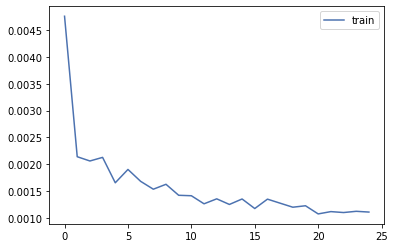

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_151 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 13s - loss: 0.0099
Epoch 2/25
494/494 - 11s - loss: 0.0060
Epoch 3/25
494/494 - 10s - loss: 0.0048
Epoch 4/25
494/494 - 11s - loss: 0.0049
Epoch 5/25
494/494 - 10s - loss: 0.0048
Epoch 6/25
494/494 - 10s - loss: 0.0046
Epoch 7/25
494/494 - 9s - loss: 0.0043
Epoch 8/25


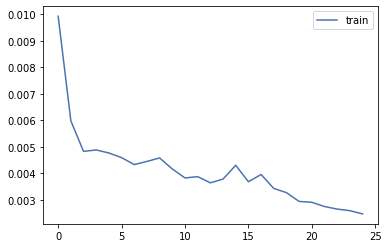

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_153 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 12s - loss: 0.0055
Epoch 2/25
494/494 - 9s - loss: 0.0026
Epoch 3/25
494/494 - 9s - loss: 0.0020
Epoch 4/25
494/494 - 9s - loss: 0.0017
Epoch 5/25
494/494 - 9s - loss: 0.0015
Epoch 6/25
494/494 - 9s - loss: 0.0017
Epoch 7/25
494/494 - 9s - loss: 0.0017
Epoch 8/25
494/4

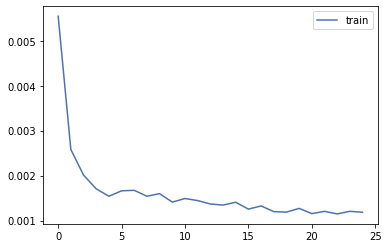

In [52]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+500:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[500:L+500,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+500:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [53]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred7 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred7['NEE'].pct_change()
DUK_daily_returns = TEST_pred7['DUK'].pct_change()

SO_daily_returns = TEST_pred7['SO'].pct_change()
D_daily_returns = TEST_pred7['D'].pct_change()

EXC_daily_returns = TEST_pred7['EXC'].pct_change()
AEP_daily_returns = TEST_pred7['AEP'].pct_change()

SRE_daily_returns = TEST_pred7['SRE'].pct_change()
XEL_daily_returns = TEST_pred7['XEL'].pct_change()

PEG_daily_returns = TEST_pred7['PEG'].pct_change()
WEC_daily_returns = TEST_pred7['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred7 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred7 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred7 = TESTDailyReturn_pred7
atx_comps_rets_cumprod_pred7 = TESTCUM_pred7

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred7, x=atx_comps_rets_cumprod_pred7.index, y=atx_comps_rets_cumprod_pred7.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred7, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred7, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred7 = EfficientFrontier(mu, Sigma)
    ef_pred7.efficient_return(i)
    vol_ef.append(ef_pred7.portfolio_performance()[1])

ef_pred7 = EfficientFrontier(mu, Sigma)
ef_pred7.min_volatility()
min_vol_ret = ef_pred7.portfolio_performance()[0]
min_vol_vol = ef_pred7.portfolio_performance()[1]

ef_pred7.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred7.portfolio_performance()[0]
max_sharpe_vol = ef_pred7.portfolio_performance()[1]


portfolioREAL_Pred7 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)

















Expected annual return: 3.7%
Annual volatility: 4.0%
Sharpe Ratio: 0.71


(0.03749657027397002, 0.040337086110234704, 0.7064608037400997)

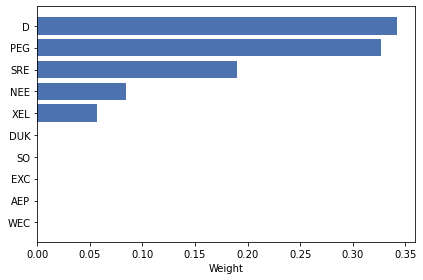

In [54]:













ef_pred7 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred7 = ef_pred7.min_volatility()

plot_weights(raw_weights_minvar_exp_pred7)
ef_pred7.portfolio_performance(verbose = True, risk_free_rate = 0.009)






Expected annual return: 41.0%
Annual volatility: 5.6%
Sharpe Ratio: 7.18


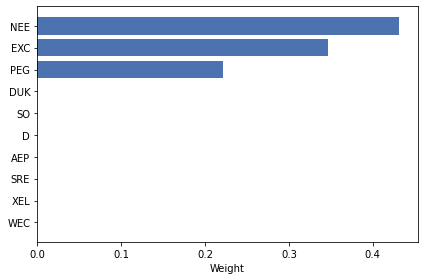

In [55]:


ef_pred7 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred7.max_sharpe(risk_free_rate=0.009)
Weight_Pred7  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred7,AV1_Pred7,SR1_Pred7=ef_pred7.portfolio_performance(verbose = True, risk_free_rate = 0.009)




In [56]:



Weight_Pred7= raw_weights_maxsharpe_exp.values()

LISTValue_Pred7= list(Weight_Pred7)

SUMpredict_Pred7 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred7))*np.mat(np.array(SUMpredict_Pred7))

per_Pred7 = pd.DataFrame(hhhhh.T,columns = ['per_Pred7'])



PortfolioREAL_Daily_Return_Pred7 = portfolioREAL_Pred7.pct_change()

PortfolioREAL_cum_returns_Pred7 = (PortfolioREAL_Daily_Return_Pred7 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred7))*(np.mat(np.array(LISTValue_Pred7)).T)

perreal_Pred7 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred7'])

In [65]:


LISTEqualWeight = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
SUMpredict = TESTCUM_pred1
Equ_Pred = np.mat(np.array(SUMpredict))*(np.mat(np.array(LISTEqualWeight)).T)

EquPred = pd.DataFrame(Equ_Pred,columns = ['Pred'])

,Pred
0,NaN
1,1.003049
2,1.004692
3,1.006560
4,1.006721
...,...
611,1.245556
612,1.255092
613,1.258795
614,1.261594


In [67]:
LISTEqualWeight = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

Equ_actual = np.mat(np.array(PortfolioREAL_cum_returns_Pred1))*np.mat(np.array(LISTEqualWeight)).T
Equactual = pd.DataFrame(Equ_actual,columns = ['Act'])

In [68]:
Equactual

,Act
0,NaN
1,1.005914
2,1.018344
3,1.023449
4,1.010779
...,...
611,1.253543
612,1.242815
613,1.240708
614,1.244162


In [69]:
Equactual.fillna(1, inplace=True)
EquPred.fillna(1, inplace=True)

In [70]:
alphaaa = [1]*100
dataper_Pred5 = {'per_Pred5':pd.Series(alphaaa)}
dataperreal_Pred5 = {'PerReal_Pred5':pd.Series(alphaaa)}



perreal_Pred5 = pd.DataFrame(dataperreal_Pred5)
per_Pred5 = pd.DataFrame(dataper_Pred5)

# 预测部分

In [71]:
per_Pred1.fillna(1, inplace=True)
per_Pred2.fillna(1, inplace=True)
per_Pred3.fillna(1, inplace=True)
per_Pred4.fillna(1, inplace=True)
per_Pred5.fillna(1, inplace=True)
per_Pred6.fillna(1, inplace=True)
per_Pred7.fillna(1, inplace=True)

In [72]:

perPred2=per_Pred2.rename(columns={'per_Pred2':'Predict'})
perPred3=per_Pred3.rename(columns={'per_Pred3':'Predict'})
perPred4=per_Pred4.rename(columns={'per_Pred4':'Predict'})
perPred5=per_Pred5.rename(columns={'per_Pred5':'Predict'})
perPred6=per_Pred6.rename(columns={'per_Pred6':'Predict'})
perPred7=per_Pred7.rename(columns={'per_Pred7':'Predict'})

In [73]:
frames = [perPred2, 
          (perPred2.iloc[-1])*perPred3, 
          ((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4, 
          (((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5, 
          ((((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5.iloc[-1])*perPred6,
          (((((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5.iloc[-1])*perPred6.iloc[-1])*perPred7]


In [74]:
PredictResult = pd.concat(frames,ignore_index=True)

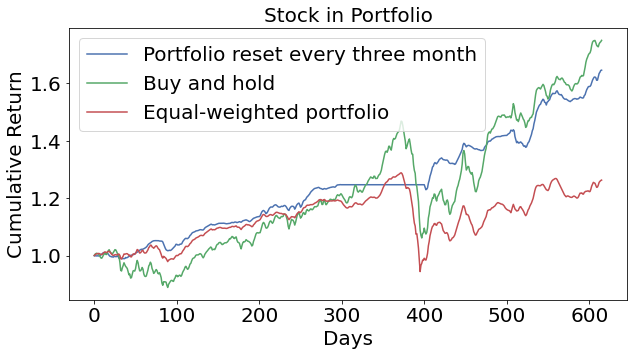

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(PredictResult)
plt.plot(per_Pred1)
plt.plot(EquPred)

plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('Stock in Portfolio', fontsize=20)
plt.show()

# 实际部分

In [76]:
perreal_Pred1.fillna(1, inplace=True)
perreal_Pred2.fillna(1, inplace=True)
perreal_Pred3.fillna(1, inplace=True)
perreal_Pred4.fillna(1, inplace=True)
perreal_Pred5.fillna(1, inplace=True)
perreal_Pred6.fillna(1, inplace=True)
perreal_Pred7.fillna(1, inplace=True)

In [77]:

perrealPred2=perreal_Pred2.rename(columns={'PerReal_Pred2':'Actual'})
perrealPred3=perreal_Pred3.rename(columns={'PerReal_Pred3':'Actual'})

perrealPred4=perreal_Pred4.rename(columns={'PerReal_Pred4':'Actual'})
perrealPred5=perreal_Pred5.rename(columns={'PerReal_Pred5':'Actual'})

perrealPred6=perreal_Pred6.rename(columns={'PerReal_Pred6':'Actual'})
perrealPred7=perreal_Pred7.rename(columns={'PerReal_Pred7':'Actual'})

In [78]:
framesReal = [perrealPred2, 
          (perrealPred2.iloc[-1])*perrealPred3, 
          ((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4, 
          (((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5, 
          ((((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5.iloc[-1])*perrealPred6, 
          (((((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5.iloc[-1])*perrealPred6.iloc[-1])*perrealPred7]
         

In [79]:
ActualResult = pd.concat(framesReal,ignore_index=True)

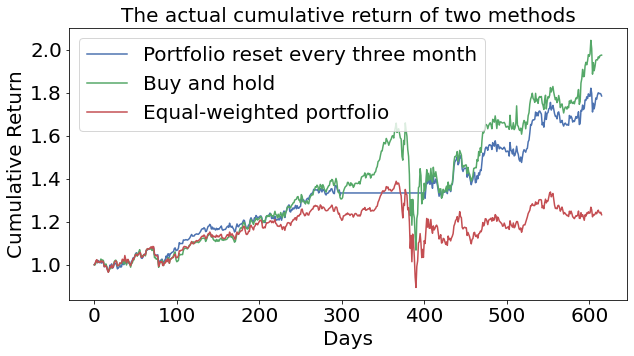

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(ActualResult)
plt.plot(perreal_Pred1)
plt.plot(Equactual)

plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('The actual cumulative return of two methods', fontsize=20)
plt.show()